# <center><b> Santander Cycle Hire Scheme</b></center>

<center><b> April 2024: London </b></center>

[Number of Bycile Hires - Transport for London] (https://data.london.gov.uk/dataset/number-bicycle-hires) last updated in April 2024

## Directory

### 1.1 Libraries 

In [26]:
import pandas as pd
import numpy as np  
import pandas as pd 


import sklearn
import statsmodels.api as sm 

import seaborn as sns
import matplotlib.pyplot as plt


!pip install missingno

import warnings
warnings.filterwarnings('ignore')

In [27]:
#seasonanlity - plot this as an average throughout the year over the time period covered

#time series decomposition 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import MSTL 


### 1.2 Data Ingestion & Sense Checking 

In [28]:

df = pd.read_excel('santander_bike_hire_daily.xlsx')
df = df.set_index('Day')

df1 = pd.read_excel('santander_lstmonth-Yr.xlsx')

In [29]:
df.dtypes

Number of Bicycle Hires    int64
dtype: object

In [30]:
df.head()

,Number of Bicycle Hires
Day,
2010-07-30,6897
2010-07-31,5564
2010-08-01,4303
2010-08-02,6642
2010-08-03,7966


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4994 entries, 2010-07-30 to 2024-03-31
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Number of Bicycle Hires  4994 non-null   int64
dtypes: int64(1)
memory usage: 78.0 KB


In [32]:
#df['Day'] = pd.to_datetime(df['Day'])  # Corrected: Added quotes around 'Day'
#df.info()

In [33]:
#rename column for ease of reference 

df = df.rename(columns={'Number of Bicycle Hires': '#_cyle_hires'})



In [34]:
df.shape

(4994, 1)

In [35]:
df.info

<bound method DataFrame.info of             #_cyle_hires
Day                     
2010-07-30          6897
2010-07-31          5564
2010-08-01          4303
2010-08-02          6642
2010-08-03          7966
...                  ...
2024-03-27         23166
2024-03-28         16576
2024-03-29         15713
2024-03-30         19917
2024-03-31         13883

[4994 rows x 1 columns]>

In [36]:
df.isna().count().sum()

4994

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4994 entries, 2010-07-30 to 2024-03-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   #_cyle_hires  4994 non-null   int64
dtypes: int64(1)
memory usage: 78.0 KB


In [38]:
df['#_cyle_hires'] = df['#_cyle_hires'].astype(float)

In [39]:
df.dtypes

#_cyle_hires    float64
dtype: object

>decriptive statistics 

In [40]:
df.describe()

,#_cyle_hires
count,4994.000000
mean,26374.176011
std,9655.357815
min,0.000000
25%,19507.500000
50%,26000.500000
75%,33087.000000
max,73094.000000


### 2.0 Visualisation 

In [41]:
from matplotlib.dates import YearLocator

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


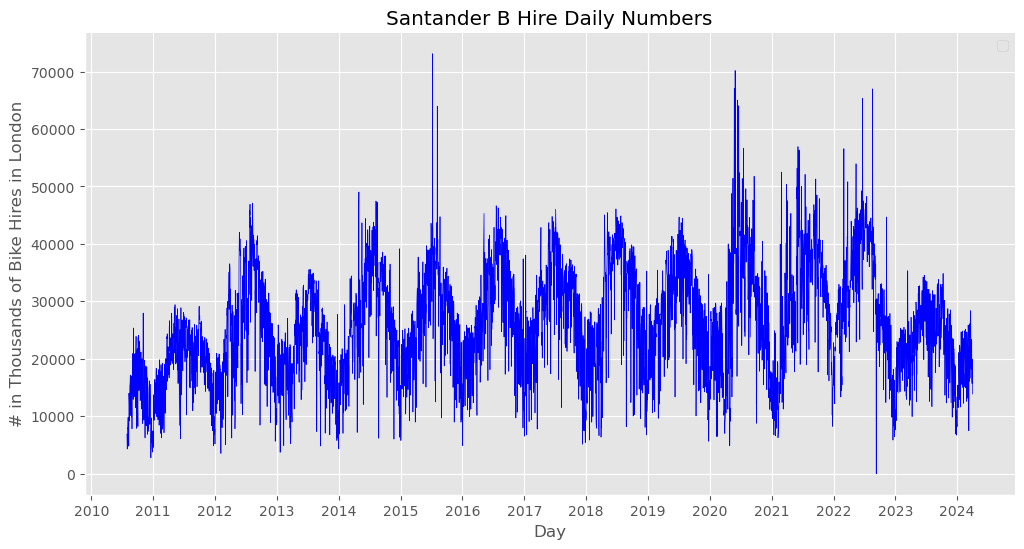

In [42]:
#fig, ax = plt.subplots()



# Set the x-axis locator to YearLocator
fig, ax = plt.subplots(figsize=(12, 6))
#ax.plot(dates, data)

years = YearLocator(base=1, month=1, day=1) 
ax.xaxis.set_major_locator(years)

# Display the gridlines
#ax.grid(which='major')


sns.lineplot(x="Day", y="#_cyle_hires", data=df, color='blue', linewidth=0.5, ax=ax )


#Add labels and legend
plt.title('Santander B Hire Daily Numbers')
plt.xlabel("Day")
plt.ylabel("# in Thousands of Bike Hires in London")
sns.despine()
sns.plotting_context("notebook")
plt.legend()
plt.style.use('ggplot')
plt.show()

In [43]:

#creating 30 day rolling average 

df['#_cyle_hires'].rolling(window=30).mean() 

rolling30 = df['#_cyle_hires'].rolling(window=30).mean() 
rolling30.head()

Day
2010-07-30   NaN
2010-07-31   NaN
2010-08-01   NaN
2010-08-02   NaN
2010-08-03   NaN
Name: #_cyle_hires, dtype: float64

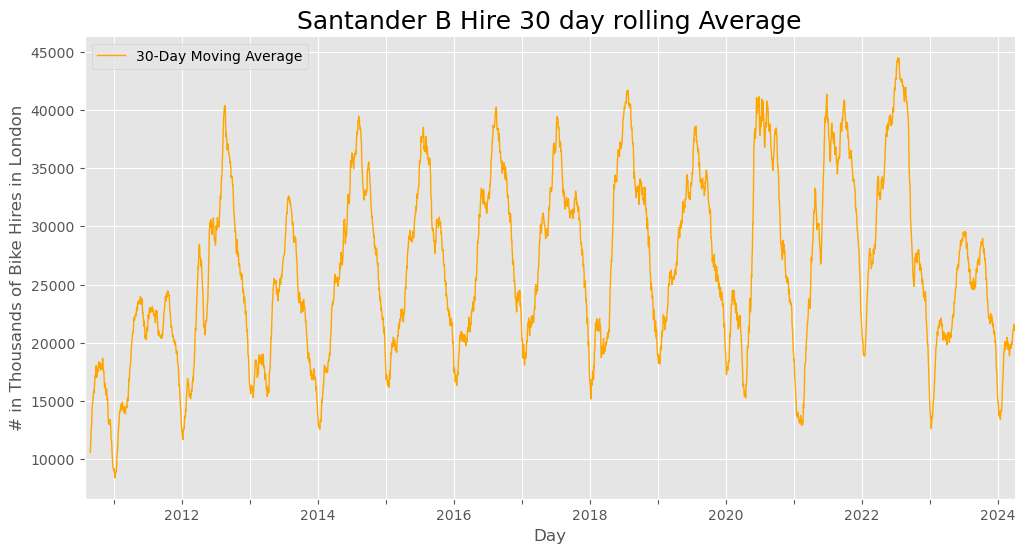

In [44]:
#create line plot for 30 day rolling average 
fig, ax = plt.subplots(figsize=(12, 6))
#Create the line plot
#plt.figure(figsize=(12, 6))
rolling30.plot(label='30-Day Moving Average',color='orange',linewidth=1, ax=ax)

years = YearLocator(base=1, month=1, day=1) 
ax.xaxis.set_major_locator(years)

# Add labels and legend
plt.title('Santander B Hire 30 day rolling Average',fontsize ='18')
plt.xlabel('Day')
plt.ylabel('# in Thousands of Bike Hires in London')
sns.despine()
plt.legend()
sns.plotting_context("notebook")
plt.style.use('ggplot')

plt.savefig("df_santander_30rolling.png")

plt.show()

In [45]:
#create line plot for 90 day rolling average with trendline 

rolling90 = df['#_cyle_hires'].rolling(window=90).mean()

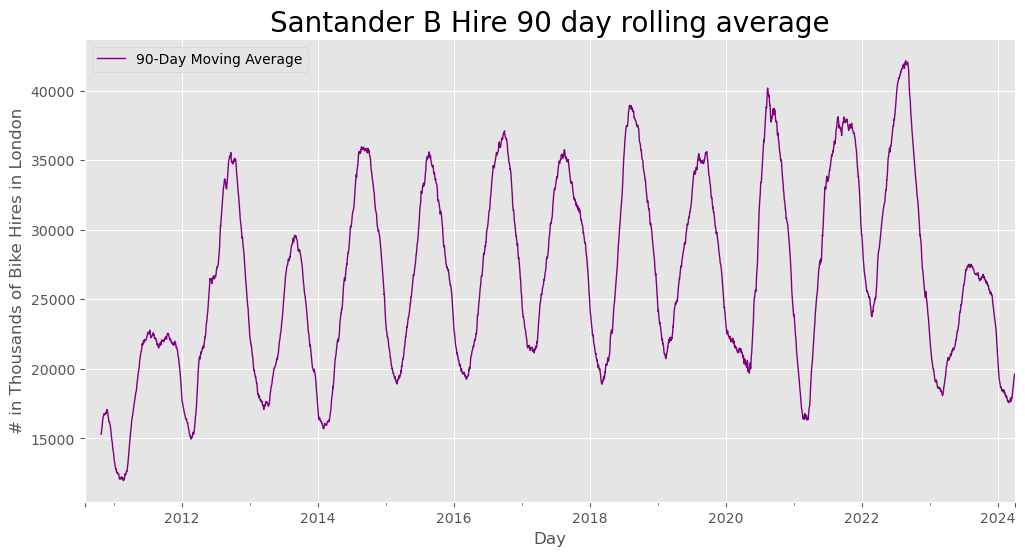

In [46]:
#create line plot for 90 day rolling average 
#Create the line plot with trendline 

plt.figure(figsize=(12, 6))
rolling90.plot(label='90-Day Moving Average',color='purple',linewidth=1)

#Add labels and legend
plt.title('Santander B Hire 90 day rolling average',fontsize ='20')
plt.xlabel("Day")
plt.ylabel("# in Thousands of Bike Hires in London")
sns.despine()
sns.plotting_context("notebook")
plt.legend()
plt.style.use('ggplot')
plt.show()

# 2.1 Weekly Data Aggregations 

In [47]:
#seeking to aggregate number by week for forthcoming aggregations 

# Group the data by week and sum the values
df_weekly = df.groupby(pd.Grouper(freq='W-MON')).sum()


In [48]:
#sense checking the data

df_weekly.head()

,#_cyle_hires
Day,
2010-08-02,23406.0
2010-08-09,55066.0
2010-08-16,79553.0
2010-08-23,99873.0
2010-08-30,78258.0


In [51]:
stl = STL(df_weekly['#_cyle_hires'])
result = stl.fit()

NameError: name 'STL' is not defined

In [52]:

seasonal, trend, resid = result.seasonal, result.trend, result.resid

NameError: name 'result' is not defined

NameError: name 'trend' is not defined

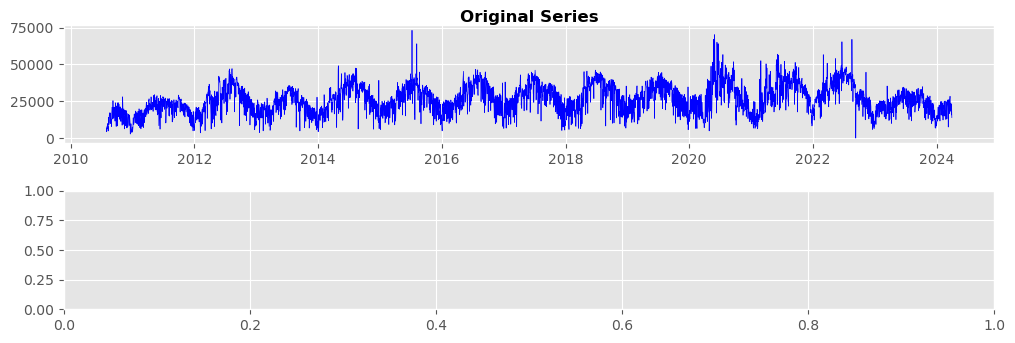

In [53]:
#plt.figure(figsize=(10,6))

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#fig.suptitle('Santander Bike Hire Data based on Weekly Statistics', fontsize=12, fontweight='bold')

plt.subplot(4,1,1)
plt.plot(df['#_cyle_hires'],color='blue',linewidth=0.5)
plt.title('Original Series', fontsize=12,fontweight='bold', pad=1)

plt.subplot(4,1,2)
plt.plot(trend,color='orange',linewidth=1)
plt.title('Trend', fontsize=12,fontweight='bold', pad=1)

plt.subplot(4,1,3)
plt.plot(seasonal, color='purple',linewidth=1)
plt.title('Seasonal', fontsize=12, fontweight='bold', pad=1)

plt.subplot(4,1,4)
plt.plot(resid,color='black',linewidth=1)
plt.title('Residual', fontsize=12,fontweight='bold', pad=1)


xf

plt.tight_layout()

In [54]:
#seeking to aggregate number by week for forthcoming aggregations 

# Group the data by week and sum the values
df_monthly = df.groupby(pd.Grouper(freq='M')).sum()

In [55]:
#sense checking the data

df_monthly.head()

,#_cyle_hires
Day,
2010-07-31,12461.0
2010-08-31,341203.0
2010-09-30,540859.0
2010-10-31,544412.0
2010-11-30,456304.0


In [56]:
stl = STL(df_monthly['#_cyle_hires'])
result = stl.fit()

NameError: name 'STL' is not defined

In [57]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

NameError: name 'result' is not defined

NameError: name 'trend' is not defined

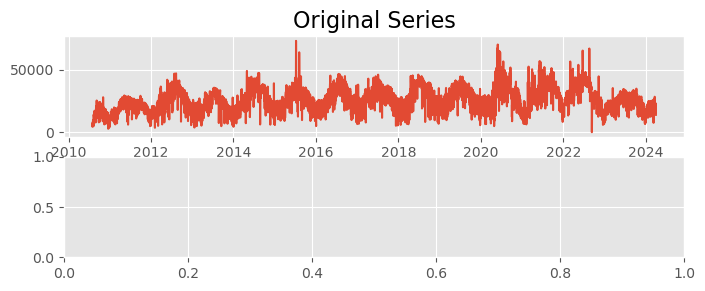

In [58]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df['#_cyle_hires'])
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

# 2.2 Quarterly Data Aggregations 

In [59]:
#seeking to aggregate number by week for forthcoming aggregations 

# Group the data by week and sum the values
df_qtrly = df.groupby(pd.Grouper(freq='Q')).sum()

In [60]:
#sense checking the data

df_qtrly.head()

,#_cyle_hires
Day,
2010-09-30,894523.0
2010-12-31,1286290.0
2011-03-31,1357625.0
2011-06-30,2034428.0
2011-09-30,2035674.0


In [61]:
stl = STL(df_qtrly['#_cyle_hires'])
result = stl.fit()

NameError: name 'STL' is not defined

In [62]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

NameError: name 'result' is not defined

NameError: name 'trend' is not defined

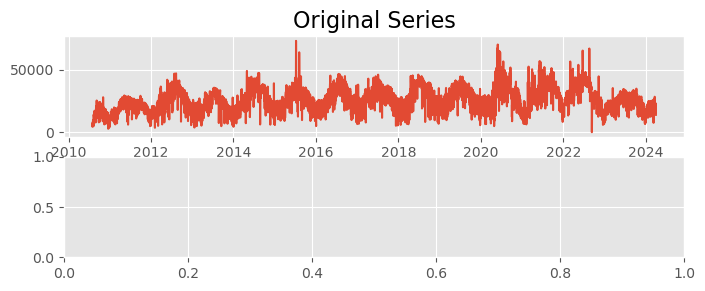

In [63]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df['#_cyle_hires'])
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

## 2.3 Detection of anomolies in times series data when aggregated by quarters 

>Exploratory Analysis 

In [64]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(df_qtrly['#_cyle_hires'],color = 'green')
plt.plot(estimated, color = 'orange')
#ax.legend()
#plt.legend(loc='upper left', fontsize='small')
#plt.legend(loc="upper left")


NameError: name 'trend' is not defined

In [65]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

NameError: name 'resid' is not defined

In [66]:
anomalies = df_qtrly['#_cyle_hires'][(resid < lower) | (resid > upper)]

NameError: name 'resid' is not defined

In [67]:
anomalies = pd.DataFrame(anomalies)
anomalies

NameError: name 'anomalies' is not defined

# 3.0 Santander Bike Hire: Last Month & Last Year Comparison 



EDA: sense checking 

In [68]:
df1.head()

,Month,Average Hire Time (mins),Unnamed: 2,Against last month,Against last year
0,2010-07-01,17.232566,NaN,NaN,NaN
1,2010-08-01,16.551880,NaN,NaN,NaN
2,2010-09-01,15.219079,NaN,NaN,NaN
3,2010-10-01,15.204481,NaN,NaN,NaN
4,2010-11-01,13.776083,NaN,NaN,NaN


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     165 non-null    datetime64[ns]
 1   Average Hire Time (mins)  165 non-null    float64       
 2   Unnamed: 2                0 non-null      float64       
 3   Against last month        150 non-null    float64       
 4   Against last year         150 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 6.6 KB


In [70]:
#dropping redundant column 

df1.drop('Unnamed: 2',axis=1, inplace=True)

In [71]:
df1.head()

,Month,Average Hire Time (mins),Against last month,Against last year
0,2010-07-01,17.232566,NaN,NaN
1,2010-08-01,16.551880,NaN,NaN
2,2010-09-01,15.219079,NaN,NaN
3,2010-10-01,15.204481,NaN,NaN
4,2010-11-01,13.776083,NaN,NaN


In [72]:
import missingno as msno 

<Axes: >

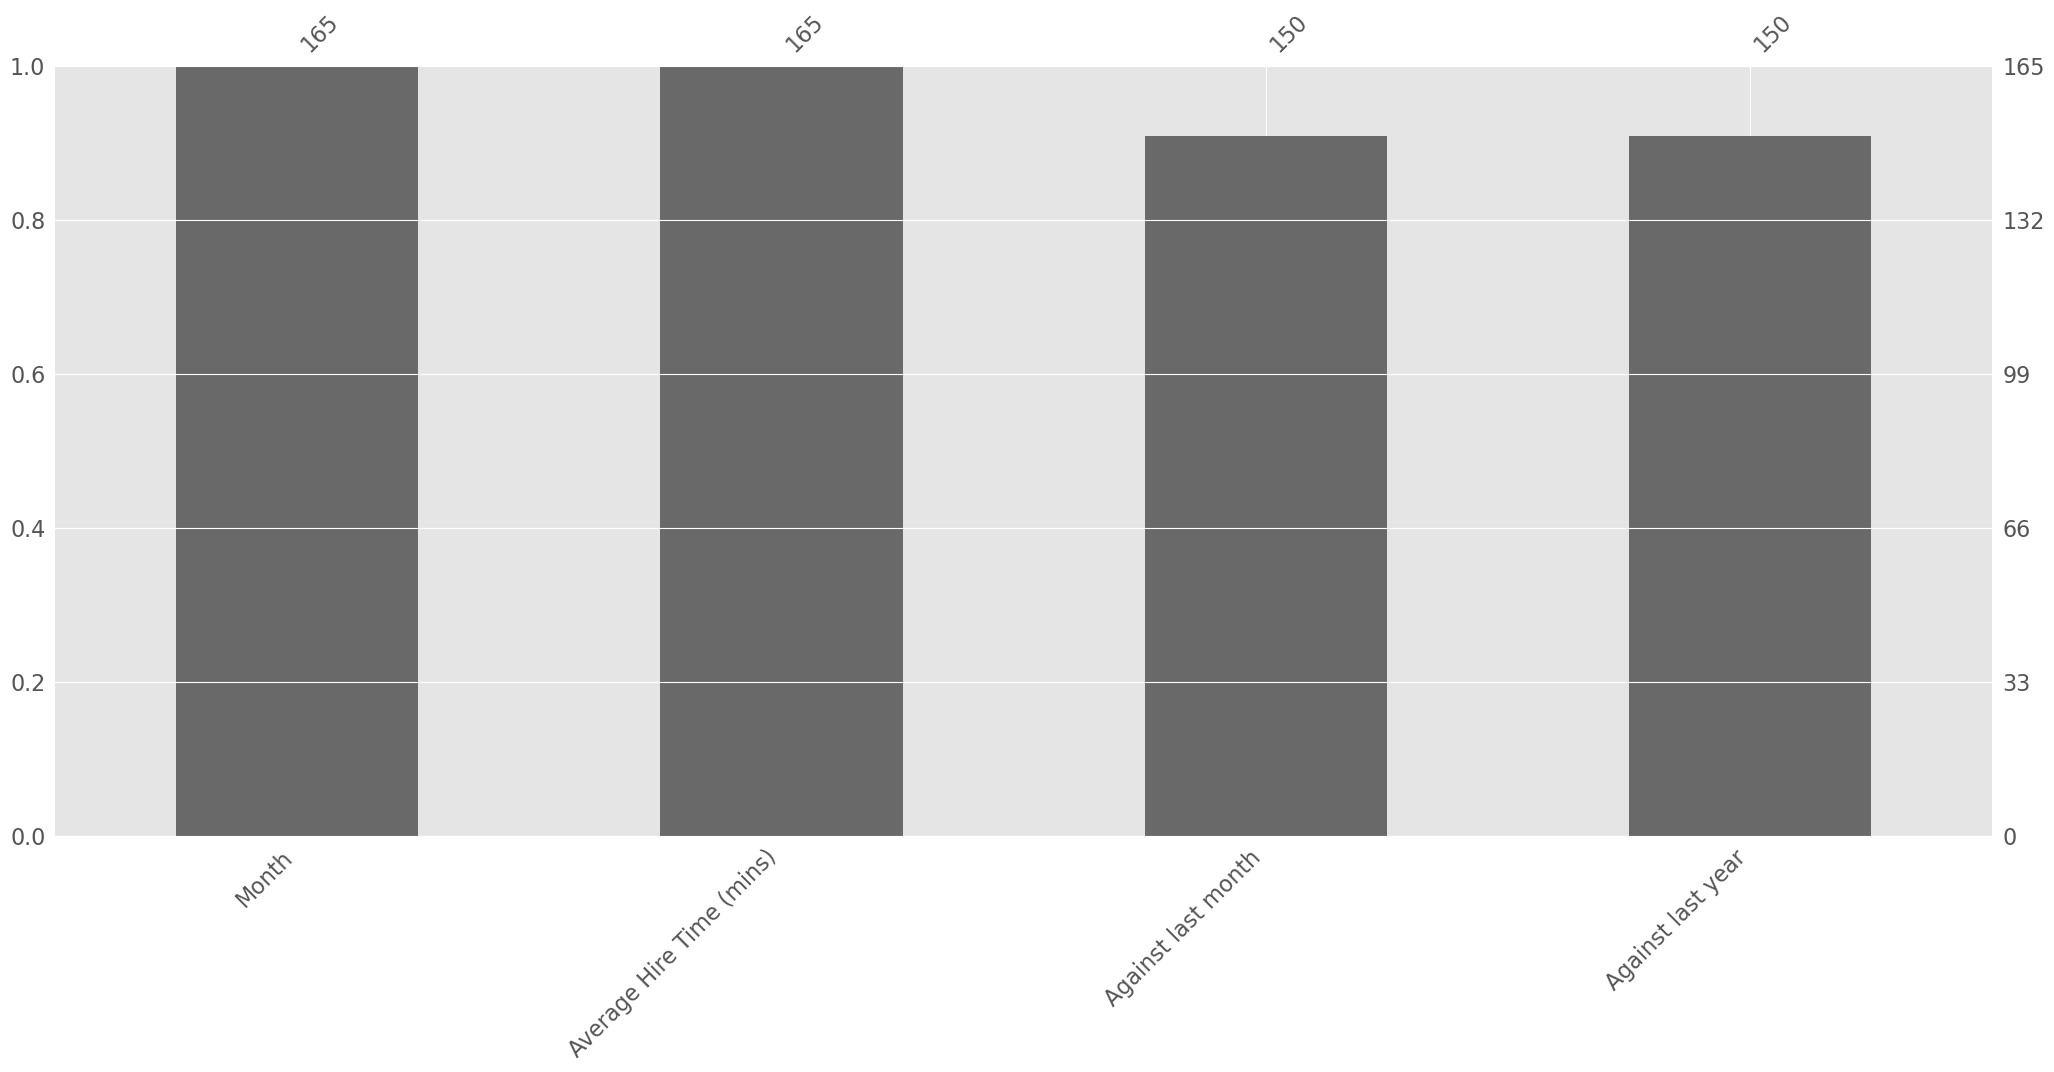

In [73]:
msno.bar(df1)

In [74]:
#Clearly we see missing values at in the last two columns, so we will subset this data and prodceed with the EDA analysis

# Subset the DataFrame where the values in all columns are not NaN
df1_no_nans = df1[~df1.isnull().any(axis=1)]


In [75]:
df1_no_nans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 15 to 164
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     150 non-null    datetime64[ns]
 1   Average Hire Time (mins)  150 non-null    float64       
 2   Against last month        150 non-null    float64       
 3   Against last year         150 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.9 KB


In [76]:
#renaming columns 
#df = df.rename(columns={'Number of Bicycle Hires': '#_cyle_hires'})


Cycle_Times = df1_no_nans.rename(columns={'Average Hire Time (mins)':'avg_hire_mins', 'Against last month':'vs_last_mth','Against last year':'vs_last_yr'})

In [77]:
Cycle_Times.describe()

,Month,avg_hire_mins,vs_last_mth,vs_last_yr
count,150,150.000000,150.000000,150.000000
mean,2017-12-15 23:02:24,19.409904,0.017249,0.045243
min,2011-10-01 00:00:00,14.728460,-0.364291,-0.422428
25%,2014-11-08 12:00:00,17.000000,-0.108013,-0.082153
50%,2017-12-16 12:00:00,19.000000,0.000876,0.032504
75%,2021-01-24 06:00:00,21.000000,0.123117,0.166698
max,2024-03-01 00:00:00,36.000000,0.896578,0.826118
std,NaN,3.393563,0.195605,0.228747


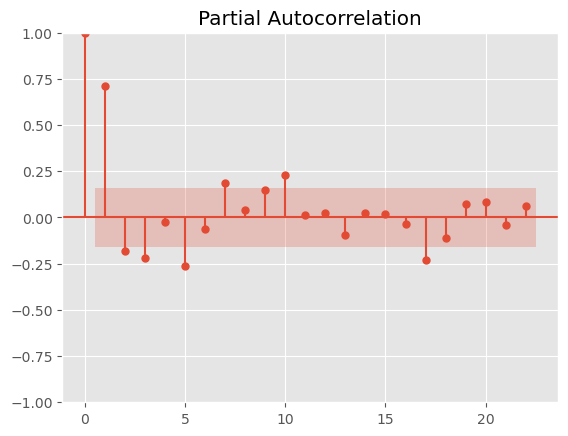

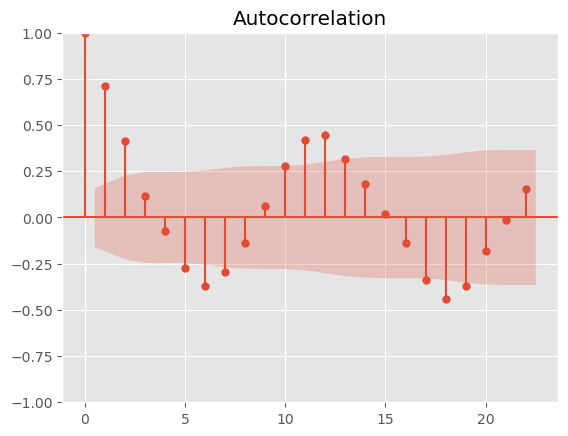

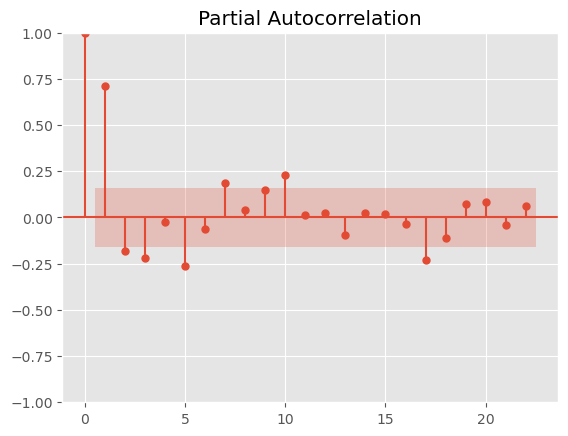

In [78]:
#visulising seasonality in the data 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Cycle_Times['avg_hire_mins'])
plot_pacf(Cycle_Times['avg_hire_mins'])


The graphic above show both Autocorrelation and Partial Autocorrelation indicatig there is a seaonal component to this dataset

# 3.0 Santander Cycle Hire Duration 

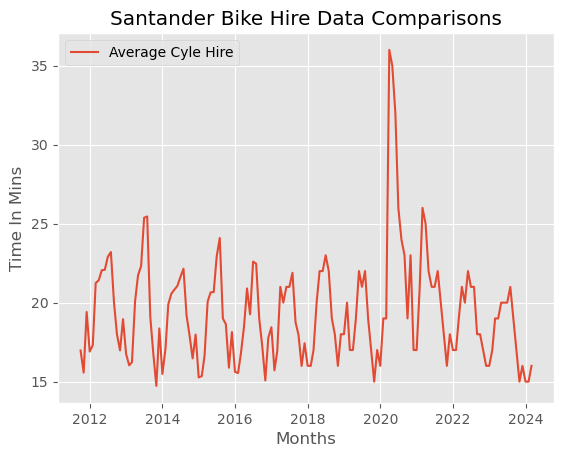

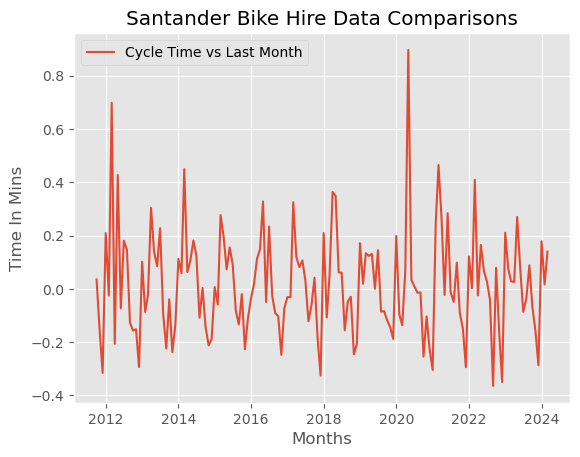

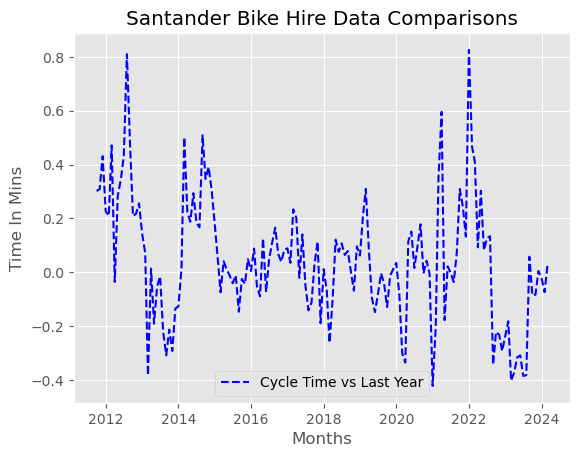

In [79]:
# plotting average cycle times 

plt.style.use('ggplot')

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

Month = Cycle_Times['Month']
Average_Cyle_Hire = Cycle_Times['avg_hire_mins']
Cycle_Time_vs_Last_Month = Cycle_Times['vs_last_mth']
Cycle_Time_vs_Last_Year = Cycle_Times['vs_last_yr']

ax1.plot(Month, Average_Cyle_Hire, label='Average Cyle Hire')

ax2.plot(Month, Cycle_Time_vs_Last_Month, label='Cycle Time vs Last Month')

ax3.plot(Month, Cycle_Time_vs_Last_Year, color='blue',
         linestyle='--', label='Cycle Time vs Last Year')

ax1.set_title('Santander Bike Hire Data Comparisons')
ax1.set_xlabel('Months')
ax1.set_ylabel('Time In Mins')
ax1.legend()

ax2.set_title('Santander Bike Hire Data Comparisons')
ax2.set_xlabel('Months')
ax2.set_ylabel('Time In Mins')
ax2.legend()

ax3.set_title('Santander Bike Hire Data Comparisons')
ax3.set_xlabel('Months')
ax3.set_ylabel('Time In Mins')
ax3.legend()


#plt.tight_layout()

plt.show()

fig1.savefig('fig1.png')
fig2.savefig('fig2.png')
fig3.savefig('fig3.png')

In [80]:
Heathy Streets Scorecard Data

SyntaxError: invalid syntax (3792920333.py, line 1)